## This code is to find out the different of each epoch and batch size combination

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Path_FashionMNIST

In [2]:
'''find the Model path'''
# find the current path
current_path = os.getcwd()
print('The current path is:', current_path)

# find the parent path
parent_path = Path(current_path).parent
print('The parent path is:', parent_path)

# find the data path
data_path1 = parent_path / 'Data/resnet34/fashion_mnist/'
data_path2 = parent_path / 'Data/resnet34/cifar100/'
print('The data path is:', data_path1)
print('The data path is:', data_path2)

The current path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/code
The parent path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090
The data path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/resnet34/fashion_mnist
The data path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/resnet34/cifar100


### extract data

In [3]:
batch_sizes = [256]
epochs = [20]
rounds = 1

#### read all the data from all the folders

In [4]:
folder_list = []
for epoch in epochs:
    for batch in batch_sizes:
        for round in range(rounds):
            folder_name = 'E' + str(epoch) + '_B' + str(batch) + '_R' + str(round)
            # print('The folder name is:', folder_name)
            folder_list.append(folder_name)
            
# find the folders in the data path
folder1_names = os.listdir(data_path1)
folder2_names = os.listdir(data_path2)
print('The folder names are:', folder1_names, folder2_names)
print('The folder list is:', folder_list)

# find the common folders
common1_folders = list(set(folder_list).intersection(folder1_names))
common2_folders = list(set(folder_list).intersection(folder2_names))
# sort the common folders
common1_folders.sort()
common2_folders.sort()
print('The common folders are:', common1_folders, common2_folders)
# print(len(common_folders))

The folder names are: ['E20_B256_R0'] ['E20_B256_R0']
The folder list is: ['E20_B256_R0']
The common folders are: ['E20_B256_R0'] ['E20_B256_R0']


### analysis data

#### find the data in same epoch and batch size

In [5]:
# read the data from the common folders
data_f = data_path1 / common1_folders[0]
data_c = data_path2 / common2_folders[0]
print('The data folder is:', data_f, data_c)
# find the files in the data folder
files_f = os.listdir(data_f)
files_c = os.listdir(data_c)
print('The files are:', files_f,'\n', files_c)


The data folder is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/resnet34/fashion_mnist/E20_B256_R0 /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/resnet34/cifar100/E20_B256_R0
The files are: ['Train_time.npy', 'Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy'] 
 ['Train_time.npy', 'Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy']


In [6]:
# read all the files in the common folders
LayersTime_f = np.load(data_f / 'Layers_time.npy', allow_pickle=True)
TrainPartTime_f = np.load(data_f / 'Train_part_time.npy', allow_pickle=True)
EpochTime_f = np.load(data_f / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy_f = np.load(data_f / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc_f = np.load(data_f / 'Train_acc.npy', allow_pickle=True)
TestAcc_f = np.load(data_f / 'Test_acc.npy', allow_pickle=True)

LayersTime_c = np.load(data_c / 'Layers_time.npy', allow_pickle=True)
TrainPartTime_c = np.load(data_c / 'Train_part_time.npy', allow_pickle=True)
EpochTime_c = np.load(data_c / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy_c = np.load(data_c / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc_c = np.load(data_c / 'Train_acc.npy', allow_pickle=True)
TestAcc_c = np.load(data_c/ 'Test_acc.npy', allow_pickle=True)

#### LayersTime

In [7]:
LayersName = ['S0_C0', 'S0_B1', 'S0_R2', 'S0_M3', 'S1_R0', 'S1_R1', 'S1_R2', 'S2_R0', 'S2_R1', 'S2_R2', 'S2_R3', 'S3_R0', 'S3_R1', 'S3_R2', 'S3_R3', 'S3_R4', 'S3_R5', 'S4_R0', 'S4_R1', 'S4_R2', 'A5', 'F6', 'L7']
print(f'The lenth of the LayersName is {len(LayersName)}')

The lenth of the LayersName is 23


##### fashionMNIST

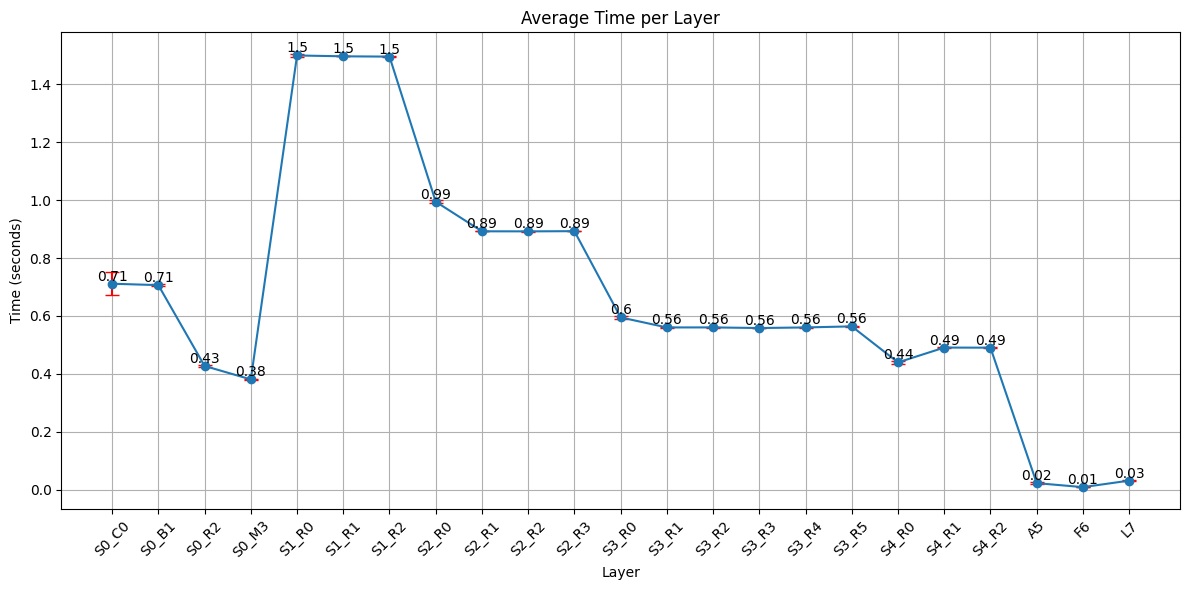

In [8]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime_f, axis=1)
layer_stds = np.std(LayersTime_f, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

In [9]:
IncepBlock = []
IncepBlockIndex = []
for i in LayersName:
    if 'R' in i:
        IncepBlock.append(i)
        IncepBlockIndex.append(LayersName.index(i))
IncepBlock = IncepBlock[1:]
IncepBlockIndex = IncepBlockIndex[1:]
print(f'The inception blocks are {IncepBlock}')
print(f'The inception block indexes are {IncepBlockIndex}')

The inception blocks are ['S1_R0', 'S1_R1', 'S1_R2', 'S2_R0', 'S2_R1', 'S2_R2', 'S2_R3', 'S3_R0', 'S3_R1', 'S3_R2', 'S3_R3', 'S3_R4', 'S3_R5', 'S4_R0', 'S4_R1', 'S4_R2']
The inception block indexes are [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [10]:
IncepNum = len(IncepBlock)
IncepTime = np.zeros((IncepNum, epochs[0]))
for i in range(IncepNum):
    IncepTime[i,:] = LayersTime_f[IncepBlockIndex[i], :]
print(f'The inception time is {IncepTime}')

The inception time is [[1.5215373  1.49853063 1.49811482 1.49754477 1.49811697 1.49938655
  1.49837255 1.49801326 1.49834347 1.49805975 1.50051069 1.49806738
  1.49861789 1.49789739 1.49805617 1.49822068 1.49853969 1.49958324
  1.498353   1.49850106]
 [1.49519372 1.49600911 1.49713922 1.49626994 1.49697948 1.49655724
  1.49800515 1.4967134  1.4969933  1.4965961  1.49726367 1.49651027
  1.49663997 1.49649858 1.4971056  1.49647307 1.49653983 1.49702454
  1.49638224 1.49626565]
 [1.49406862 1.49514914 1.49595666 1.49565101 1.49628019 1.49554515
  1.49623275 1.49581933 1.49617958 1.49577069 1.49620652 1.49531245
  1.49562407 1.49564195 1.49564362 1.49564648 1.49518394 1.49622273
  1.49541688 1.4954071 ]
 [1.01704979 0.99276495 0.99346685 0.994241   0.9931128  0.99290228
  0.99352121 0.99548316 0.99319625 0.99310279 0.99359989 0.99278569
  0.99597955 0.99304342 0.99288201 0.99298811 0.99264264 0.99341345
  0.99280572 0.99294925]
 [0.89082766 0.89185405 0.89396501 0.89202261 0.89258218 0.892

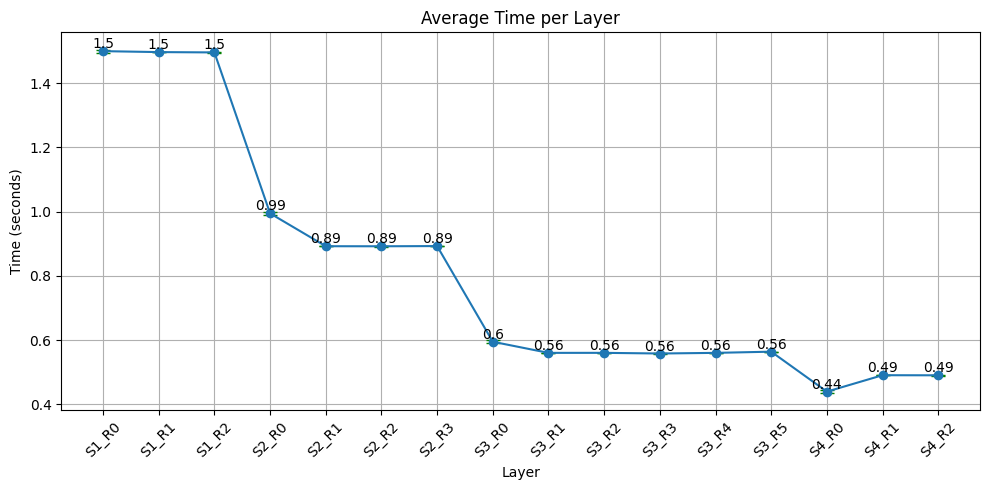

In [11]:
# Calculate the mean and standard deviation for each layer
inceplayer_means = np.mean(IncepTime, axis=1)
inceplayer_stds = np.std(IncepTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(IncepBlock, inceplayer_means, yerr=inceplayer_stds, fmt='-o', ecolor='g', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(IncepBlock)):
    plt.text(i, inceplayer_means[i], np.round(inceplayer_means[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

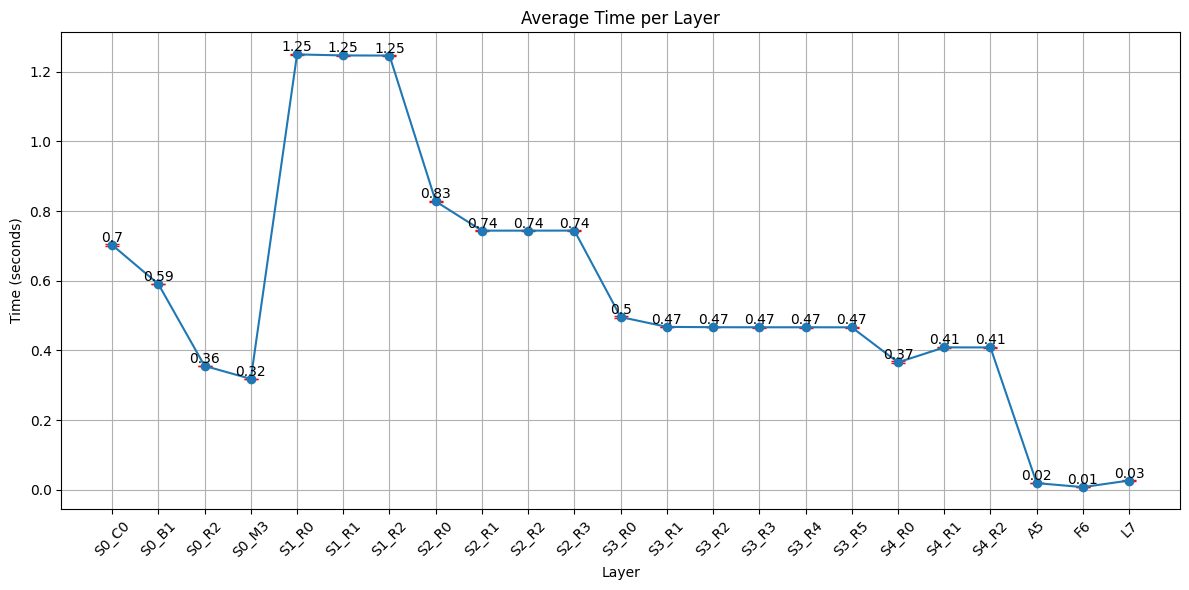

In [12]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime_c, axis=1)
layer_stds = np.std(LayersTime_c, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

In [13]:
IncepBlock = []
IncepBlockIndex = []
for i in LayersName:
    if 'R' in i:
        IncepBlock.append(i)
        IncepBlockIndex.append(LayersName.index(i))
IncepBlock = IncepBlock[1:]
IncepBlockIndex = IncepBlockIndex[1:]
print(f'The inception blocks are {IncepBlock}')
print(f'The inception block indexes are {IncepBlockIndex}')

The inception blocks are ['S1_R0', 'S1_R1', 'S1_R2', 'S2_R0', 'S2_R1', 'S2_R2', 'S2_R3', 'S3_R0', 'S3_R1', 'S3_R2', 'S3_R3', 'S3_R4', 'S3_R5', 'S4_R0', 'S4_R1', 'S4_R2']
The inception block indexes are [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [14]:
IncepNum = len(IncepBlock)
IncepTime = np.zeros((IncepNum, epochs[0]))
for i in range(IncepNum):
    IncepTime[i,:] = LayersTime_c[IncepBlockIndex[i], :]
print(f'The inception time is {IncepTime}')

The inception time is [[1.25480628 1.24951267 1.24986792 1.24996591 1.24904466 1.24977207
  1.24950504 1.24934602 1.25021195 1.25021386 1.25050712 1.25026965
  1.25002742 1.24988103 1.2494812  1.24918699 1.24960876 1.24956918
  1.24899745 1.2498641 ]
 [1.24615693 1.2465353  1.24690557 1.24701405 1.24879622 1.24710035
  1.24667144 1.24671102 1.24705148 1.24721217 1.24741387 1.24719238
  1.24717975 1.24675965 1.24686813 1.24702907 1.2470696  1.24674129
  1.24631143 1.24736881]
 [1.24582171 1.24609041 1.24649715 1.24685717 1.24671984 1.24645257
  1.24653697 1.24630356 1.24667525 1.24697661 1.24698877 1.24663186
  1.2469635  1.24677181 1.2466836  1.24655604 1.24734735 1.24664402
  1.24618244 1.24683499]
 [0.83804607 0.82667565 0.82741308 0.8274982  0.8269248  0.8268311
  0.82679033 0.82696247 0.82687306 0.82755256 0.82775068 0.82748532
  0.83111072 0.8271637  0.82676816 0.82711864 0.82723618 0.82707047
  0.82666874 0.8273406 ]
 [0.74338746 0.74329615 0.74485278 0.74403238 0.74394584 0.7435

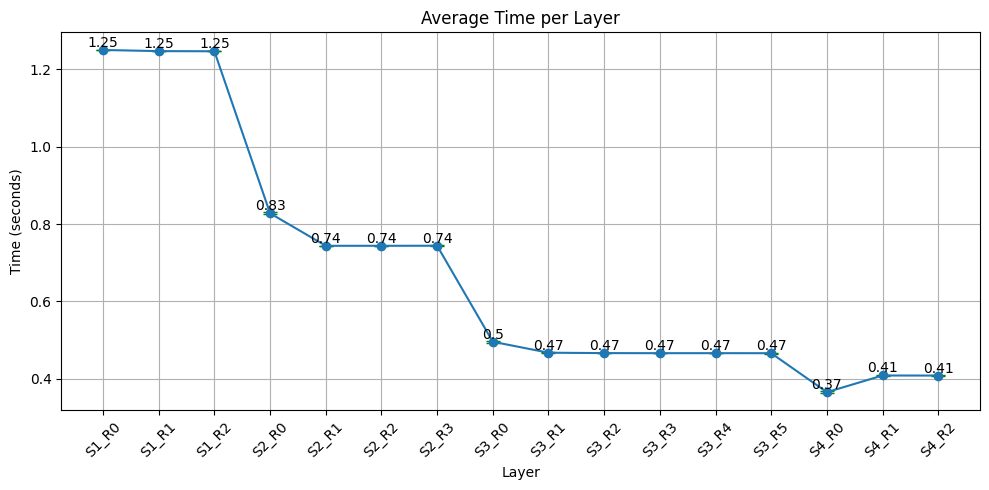

In [15]:
# Calculate the mean and standard deviation for each layer
inceplayer_means = np.mean(IncepTime, axis=1)
inceplayer_stds = np.std(IncepTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(IncepBlock, inceplayer_means, yerr=inceplayer_stds, fmt='-o', ecolor='g', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(IncepBlock)):
    plt.text(i, inceplayer_means[i], np.round(inceplayer_means[i], 2), ha='center', va='bottom')
plt.show()

#### TrainPartTime

In [16]:
TrainPartName = ['TimeToDevice', 'Forward', 'Backward', 'Test']

##### fashionMNIST

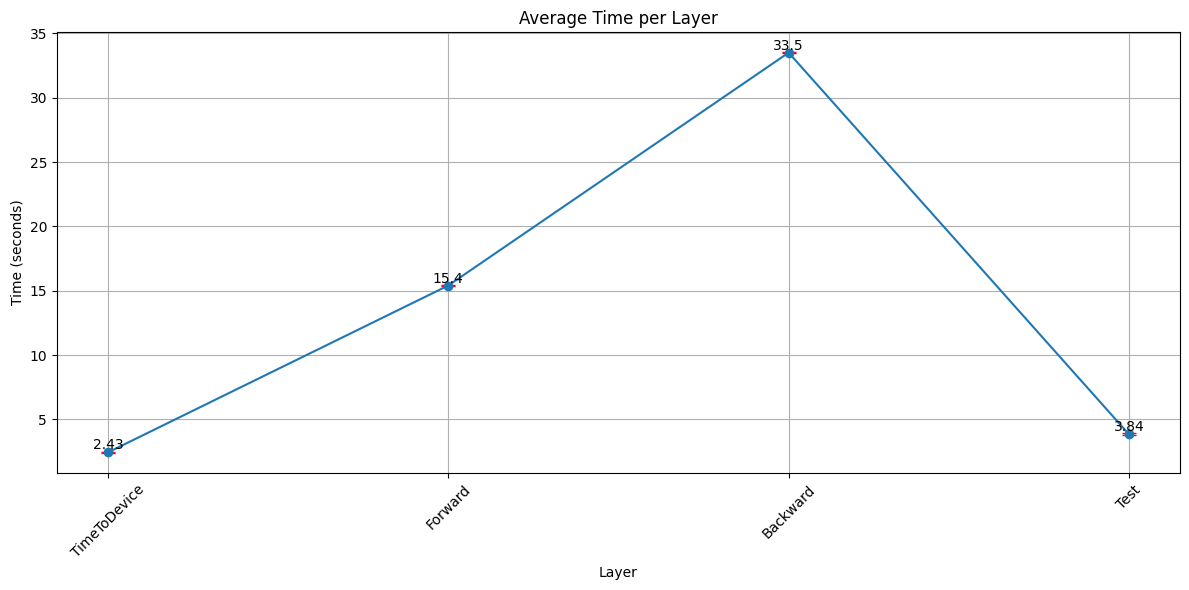

In [17]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime_f, axis=1)
trainpart_stds = np.std(TrainPartTime_f, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

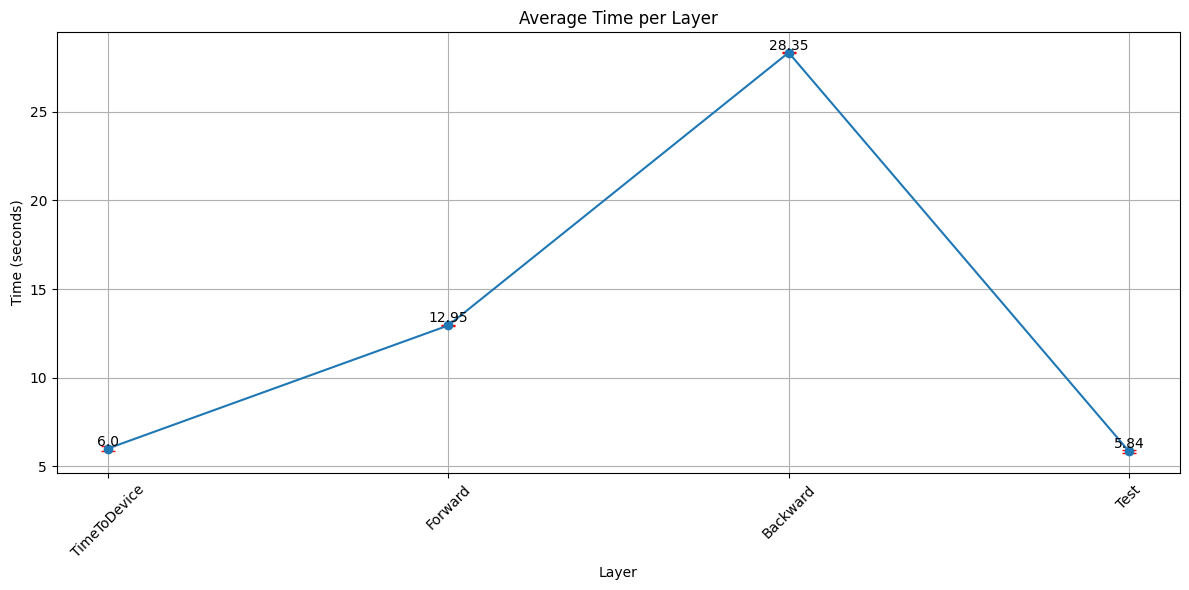

In [18]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime_c, axis=1)
trainpart_stds = np.std(TrainPartTime_c, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()

#### EpochEnergy

##### fashionMNIST

In [19]:
totalEpochEnergy_f = np.zeros((1, epochs[0]))
avgEpochEnergy_f = np.zeros((1, epochs[0]))
print('The total energy is:', totalEpochEnergy_f.shape, avgEpochEnergy_f.shape)

The total energy is: (1, 20) (1, 20)


In [20]:
for i in range(EpochEnergy_f.shape[0]):
    Energy_epoch = EpochEnergy_f[i][0]
    # print(Energy_epoch)
    totalEnergy_epoch_f = np.sum(Energy_epoch)
    avgEpochEnergy_epoch_f = np.mean(Energy_epoch)
    totalEnergy_epoch_f = np.round(totalEnergy_epoch_f, 2)
    avgEpochEnergy_epoch_f = np.round(avgEpochEnergy_epoch_f, 2)
    totalEpochEnergy_f[0,i] = totalEnergy_epoch_f
    avgEpochEnergy_f[0,i] = avgEpochEnergy_epoch_f
print(f'The total energy per epoch is: {totalEpochEnergy_f}')
print(f'The average energy per epoch is: {avgEpochEnergy_f}')

The total energy per epoch is: [[16939.63 17449.93 17803.42 17609.92 17655.78 17645.78 17703.08 17686.58
  17646.01 17630.55 17628.79 17656.7  17622.24 17582.97 17613.03 17625.35
  17596.89 17596.53 17656.85 17865.36]]
The average energy per epoch is: [[277.7  290.83 291.86 293.5  294.26 294.1  295.05 294.78 294.1  293.84
  293.81 294.28 293.7  293.05 293.55 293.76 293.28 293.28 294.28 288.15]]


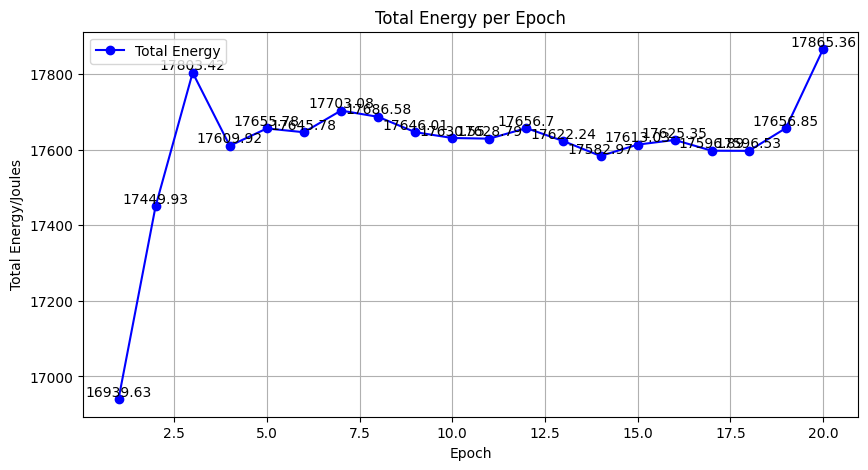

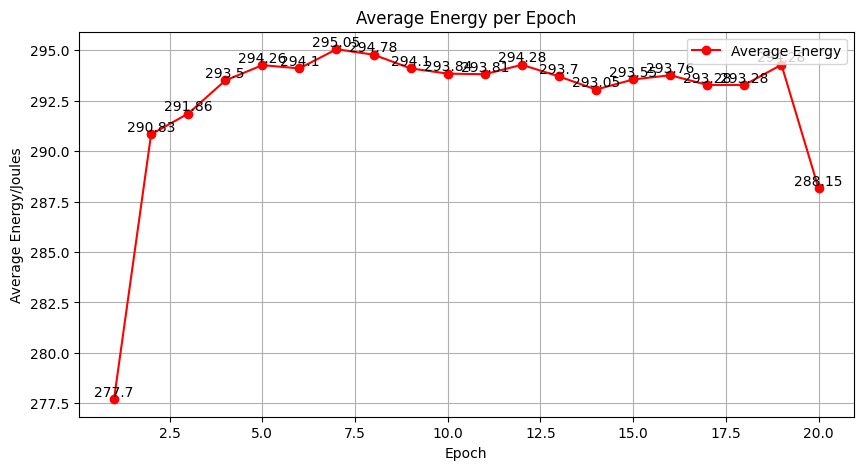

In [21]:
epoch_list = np.arange(1, epochs[0]+1)

# Plotting the total energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Total Energy')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], totalEpochEnergy_f[0,i], totalEpochEnergy_f[0,i], ha='center', va='bottom')
plt.show()

# Plotting the average energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, avgEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='r', label='Average Energy')
plt.title('Average Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], avgEpochEnergy_f[0,i], avgEpochEnergy_f[0,i], ha='center', va='bottom')
plt.show()

In [22]:
# print(len(epoch_list), len(avgEpochEnergy_f.reshape(-1,)))
AvgTotalEnergyEpoch = np.mean(totalEpochEnergy_f.reshape(-1,))
StdEnergyEpoch = np.std(totalEpochEnergy_f.reshape(-1,))
print(f'The average energy per epoch is: {AvgTotalEnergyEpoch}, the standard deviation is: {StdEnergyEpoch}')

The average energy per epoch is: 17610.769500000002, the standard deviation is: 173.70339451130457


In [23]:
# print(len(epoch_list), len(avgEpochEnergy_f.reshape(-1,)))
AvgEnergyEpoch = np.mean(avgEpochEnergy_f.reshape(-1,))
StdEnergyEpoch = np.std(avgEpochEnergy_f.reshape(-1,))
print(f'The average energy per epoch is: {AvgEnergyEpoch}, the standard deviation is: {StdEnergyEpoch}')

The average energy per epoch is: 292.55799999999994, the standard deviation is: 3.7249840268113923


##### cifar100 

In [24]:
totalEpochEnergy_c = np.zeros((1, epochs[0]))
avgEpochEnergy_c = np.zeros((1, epochs[0]))
print('The total energy is:', totalEpochEnergy_c.shape, avgEpochEnergy_c.shape)

The total energy is: (1, 20) (1, 20)


In [25]:
for i in range(EpochEnergy_c.shape[0]):
    Energy_epoch = EpochEnergy_c[i][0]
    # print(Energy_epoch)
    totalEnergy_epoch_c = np.sum(Energy_epoch)
    avgEpochEnergy_epoch_c = np.mean(Energy_epoch)
    totalEnergy_epoch_c = np.round(totalEnergy_epoch_c, 2)
    avgEpochEnergy_epoch_c = np.round(avgEpochEnergy_epoch_c, 2)
    totalEpochEnergy_c[0,i] = totalEnergy_epoch_c
    avgEpochEnergy_c[0,i] = avgEpochEnergy_epoch_c
print(f'The total energy per epoch is: {totalEpochEnergy_c}')
print(f'The average energy per epoch is: {avgEpochEnergy_c}')

The total energy per epoch is: [[15500.43 15849.9  15898.05 15843.15 15821.05 15915.88 15902.06 15851.24
  15840.78 16082.57 16108.76 15805.02 15884.48 15898.81 15745.58 15990.81
  15880.47 15901.55 15858.85 15811.76]]
The average energy per epoch is: [[250.01 255.64 256.42 255.53 255.18 256.71 256.48 255.67 255.5  251.29
  251.7  254.92 256.2  256.43 258.12 253.82 256.14 256.48 255.79 255.03]]


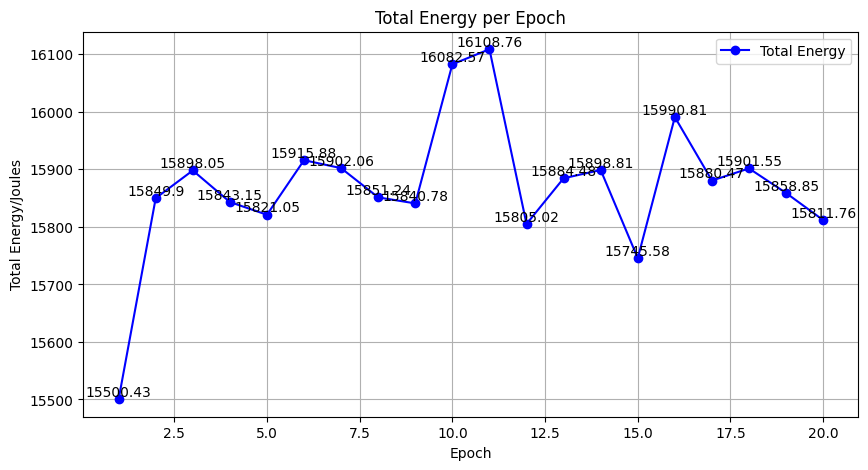

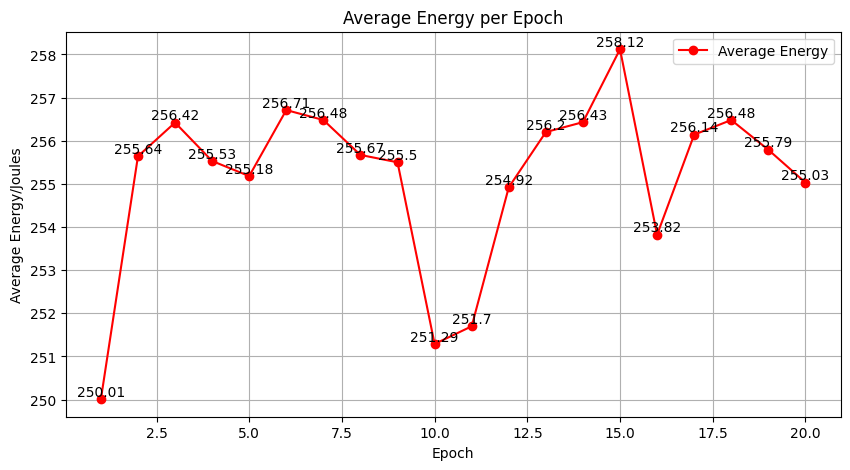

In [26]:
epoch_list = np.arange(1, epochs[0]+1)

# Plotting the total energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='b', label='Total Energy')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], totalEpochEnergy_c[0,i], np.round(totalEpochEnergy_c[0,i], 2), ha='center', va='bottom')
plt.show()

# Plotting the average energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, avgEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='r', label='Average Energy')
plt.title('Average Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], avgEpochEnergy_c[0,i], np.round(avgEpochEnergy_c[0,i], 2), ha='center', va='bottom')
plt.show()

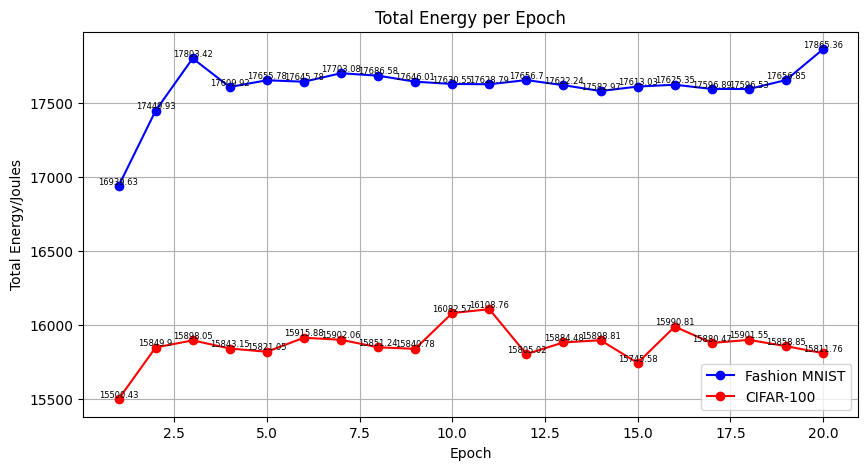

In [27]:
# plot total energy per epoch of two datasets
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Fashion MNIST')
plt.plot(epoch_list, totalEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='r', label='CIFAR-100')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point, with smaller font size
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], totalEpochEnergy_f[0,i], np.round(totalEpochEnergy_f[0,i], 2), ha='center', va='bottom', fontsize=6)
    plt.text(epoch_list[i], totalEpochEnergy_c[0,i], np.round(totalEpochEnergy_c[0,i], 2), ha='center', va='bottom', fontsize=6)
plt.show()

#### EpochTime

##### fashionMNIST

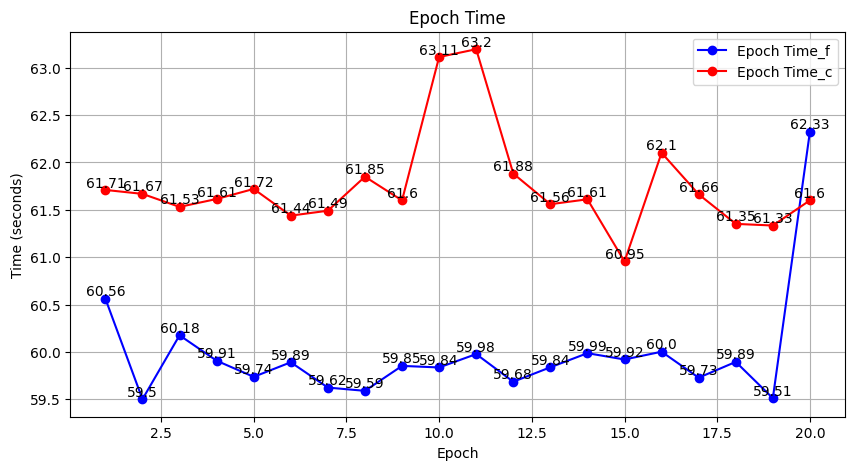

In [28]:
# plot the EpochTime_f and EpochTime_c
epoch_list = np.arange(1, epochs[0]+1)
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, EpochTime_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Epoch Time_f')
plt.plot(epoch_list, EpochTime_c.reshape(-1,), marker='o', linestyle='-', color='r', label='Epoch Time_c')
plt.title('Epoch Time')
plt.xlabel('Epoch')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], EpochTime_f[i], np.round(EpochTime_f[i], 2), ha='center', va='bottom')
    plt.text(epoch_list[i], EpochTime_c[i], np.round(EpochTime_c[i], 2), ha='center', va='bottom')
plt.show()

In [29]:
EpochTime_f

array([60.56207776, 59.50022626, 60.17503691, 59.90681052, 59.73649144,
       59.89037824, 59.62323833, 59.58868122, 59.85219932, 59.83548427,
       59.97665524, 59.68490982, 59.83740854, 59.98619652, 59.91963196,
       60.00179648, 59.72743201, 59.89437103, 59.51083565, 62.32581115])

##### cifar100

In [30]:
EpochTime_c

array([61.70969081, 61.66800189, 61.53075743, 61.61397982, 61.72008348,
       61.4384048 , 61.49026823, 61.84942389, 61.59898829, 63.11299467,
       63.19513035, 61.88204956, 61.55900764, 61.61074495, 60.95438027,
       62.10144377, 61.66328859, 61.35127115, 61.3339653 , 61.59960842])